In [1]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

scaler = StandardScaler()

# Normalize the data
scaled_data = scaler.fit_transform(df_market_data)


In [6]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(
    scaled_data,
    columns=df_market_data.columns,
    index=df_market_data.index
)

# Copy the crypto names from the original DataFrame
df_market_data_scaled['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_market_data_scaled.set_index('coin_id', inplace=True)

# Display the scaled DataFrame
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [8]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    # 2. Fit the model to the data using `df_market_data_scaled`
    kmeans_model.fit(df_market_data_scaled)
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)

# Display the inertia values
inertia_values


[287.0,
 198.57181809798124,
 145.63574772192865,
 79.02243535120977,
 66.21778006000339,
 59.13907002537008,
 48.40631449041362,
 38.9935879892797,
 34.40059545400234,
 28.573602560967853,
 23.89004435537795]

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

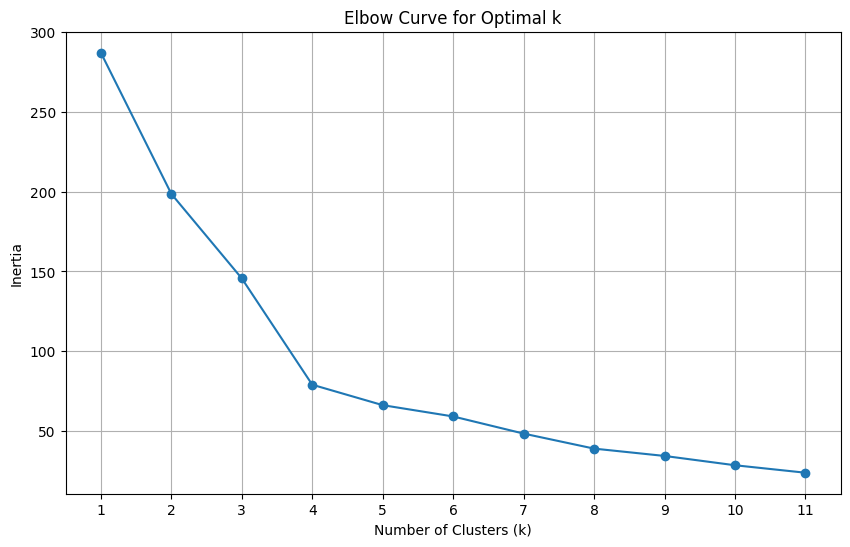

In [10]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve for Optimal k")
plt.xticks(df_elbow["k"])  # Set x-ticks to show each k value
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for `k` is 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [11]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=0)

In [12]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(df_market_data_scaled)

KMeans(n_clusters=4, random_state=0)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
crypto_clusters = kmeans_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(crypto_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [14]:
# Create a copy of the scaled DataFrame
df_market_data_scaled_copy = df_market_data_scaled.copy()


In [15]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_data_scaled_copy["Cluster"] = crypto_clusters

# Display the copy of the scaled DataFrame
df_market_data_scaled_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [16]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = df_market_data_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters based on 24h and 7d Price Changes"
)

# Display the plot
scatter_plot


:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`
pca_model = PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca_model.fit_transform(df_market_data_scaled)

# View the scaled PCA data
df_pca_data = pd.DataFrame(
    pca_data,
    columns=["PC1", "PC2", "PC3"],
    index=df_market_data_scaled.index
)

# Display the first few rows of the PCA-transformed data
df_pca_data.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [19]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_

# Display the explained variance for each principal component
print("Explained Variance for Each Principal Component:", explained_variance)
print("Total Explained Variance:", explained_variance.sum())

Explained Variance for Each Principal Component: [0.3719856  0.34700813 0.17603793]
Total Explained Variance: 0.895031657030984


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is 0.8953.

In [20]:
# Create a new DataFrame with the PCA data.
df_pca_data = pd.DataFrame(
    pca_data,
    columns=["PC1", "PC2", "PC3"],
    index=df_market_data_scaled.index  # Copy the crypto names from the original scaled DataFrame
)

# Set the coin_id column as index

# Display the scaled PCA DataFrame
df_pca_data.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [21]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [22]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    # 2. Fit the model to the data using `df_market_data_pca`
    kmeans_model.fit(df_pca_data)
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)


In [23]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    "k": k_values,
    "inertia": inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

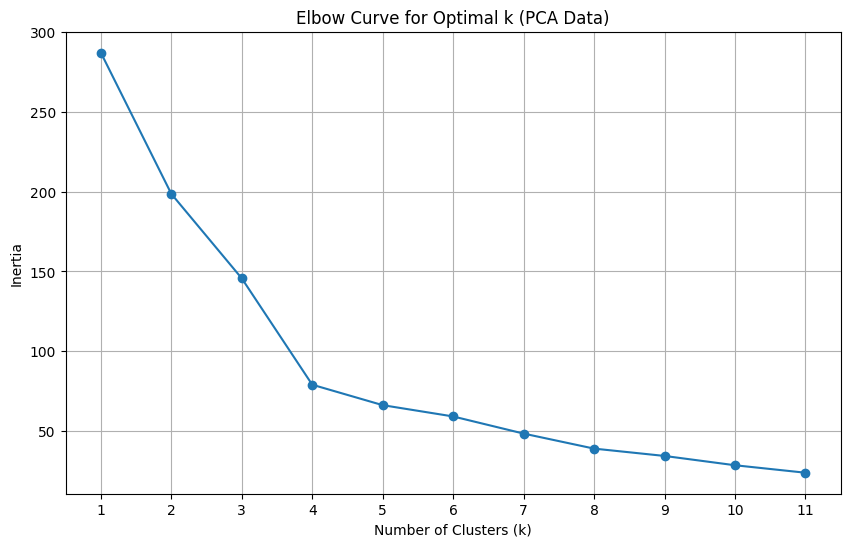

In [24]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve for Optimal k (PCA Data)")
plt.xticks(df_elbow["k"]) 
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for `k` is 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It does not differ from the original data.

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [25]:
# Initialize the K-Means model using the best value for k
kmeans_model_pca = KMeans(n_clusters=4, random_state=0)


In [26]:
# Fit the K-Means model using the PCA data
kmeans_model_pca.fit(df_pca_data)

KMeans(n_clusters=4, random_state=0)

In [27]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
crypto_clusters_pca = kmeans_model_pca.predict(df_pca_data)

# Print the resulting array of cluster values.
print(crypto_clusters_pca)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [28]:
# Create a copy of the scaled PCA DataFrame
df_pca_data_copy = df_pca_data.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_data_copy["Cluster"] = crypto_clusters_pca

# Display the copy of the scaled PCA DataFrame
df_pca_data_copy.head()

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [29]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

scatter_plot_pca = df_pca_data_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters based on PCA Components"
)

# Display the plot
scatter_plot_pca


:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

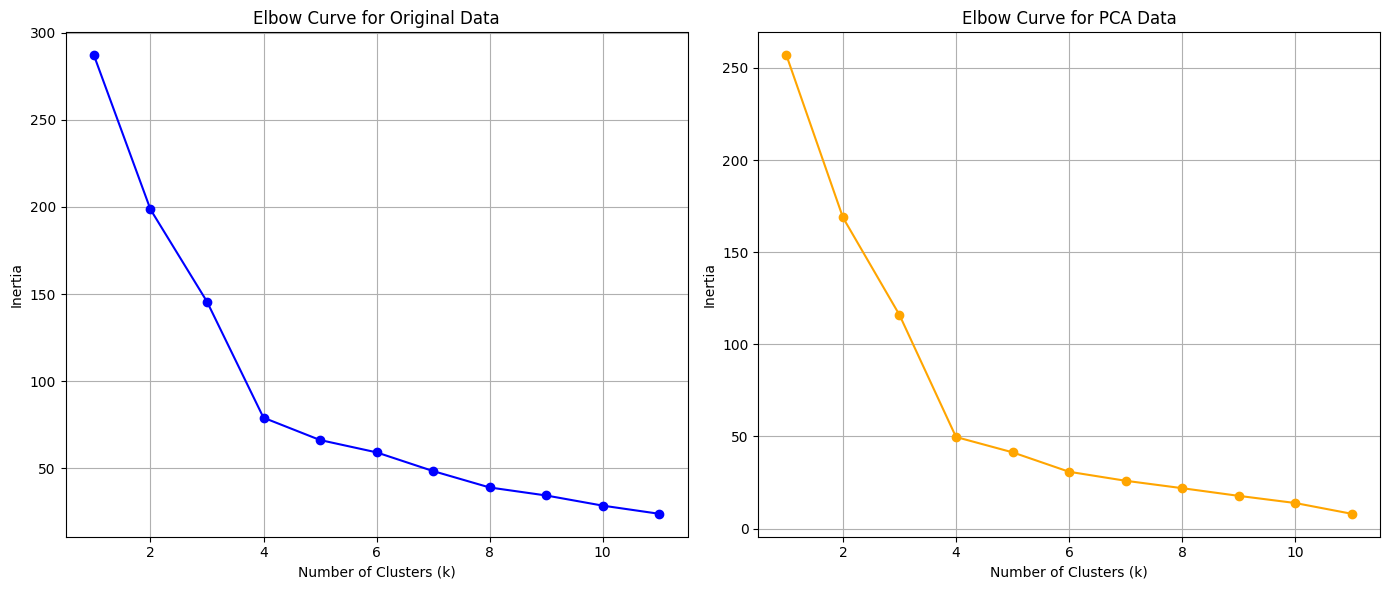

In [30]:
# Composite plot to contrast the Elbow curves

# Set up the figure and create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Elbow curve for original data on the first subplot
axes[0].plot(df_elbow["k"], df_elbow["inertia"], marker='o', color='b')
axes[0].set_title("Elbow Curve for Original Data")
axes[0].set_xlabel("Number of Clusters (k)")
axes[0].set_ylabel("Inertia")
axes[0].grid(True)

# Plot Elbow curve for PCA data on the second subplot
axes[1].plot(df_elbow_pca["k"], df_elbow_pca["inertia"], marker='o', color='orange')
axes[1].set_title("Elbow Curve for PCA Data")
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Inertia")
axes[1].grid(True)

# Show the side-by-side plots
plt.tight_layout()
plt.show()




In [31]:
# Composite plot to contrast the clusters
# Scatter plot for clusters with original data
scatter_original = df_market_data_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["coin_id"],
    title="Clusters with Original Data"
)

# Scatter plot for clusters with PCA data
scatter_pca = df_pca_data_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Cluster",
    hover_cols=["coin_id"],
    title="Clusters with PCA Data"
)

# Display side-by-side for comparison
scatter_original + scatter_pca


:Layout
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features with PCA simplifies the data by focusing on the most significant variance, making the K-Means algorithm faster and often highlighting clearer patterns. However, this simplification may cause some loss of detail, potentially altering cluster assignments compared to the original data. Despite this, PCA enables easier visualization and interpretability, providing a balance between simplicity and the richness of the data.